<a href="https://colab.research.google.com/github/scarlxrd54288/Laboratorio-02---Rodriguez-Medina-Leyla-Camila/blob/main/Laboratorio_04_Regresi%C3%B3n_One_vs_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación multiclase

## Introduction

En este ejercicio se implementa la regresion one-vs-all y una red neuronal para reconocimiento de digitos.

Antes de empezar la ejecución de las partes de codigo correspondienters a los ejercicios, se requiere importar todas las librerias necesarias.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# Preparación y Normalización de Datos para un Modelo de Clasificación

Se preparan los datos para entrenar un modelo de clasificación, con el objetivo de que todo esté listo para que el algoritmo aprenda de manera eficiente. Ahora te explico lo que hace, de forma sencilla:

Mapeo de etiquetas (especies de aves): El conjunto de datos tiene etiquetas que son nombres de aves (como "flammea", "palustris", etc.). Para que el modelo pueda trabajar con ellas, las convierte en números. Cada especie se reemplaza por un valor numérico, ya que los algoritmos de aprendizaje automático no entienden palabras, solo números.

Normalización de los datos: Normalizar significa ajustar los valores para que todas las características (las columnas de datos) tengan una escala similar. Esto es importante porque si una característica tiene números muy grandes y otra muy pequeños, el modelo podría prestar más atención a la que tiene valores más grandes, y eso no es lo que queremos. Por eso, la función featureNormalize se asegura de que todas las columnas tengan una media de 0 y una desviación estándar de 1, lo que las pone en igualdad de condiciones.

Función featureNormalize(X): Esta es la función que se encarga de la normalización. Recibe una tabla de datos X (que contiene las características de cada muestra), y luego calcula dos cosas importantes para cada columna: la media (el promedio) y la desviación estándar (cuánto varían los datos). Luego, ajusta los valores de cada columna para que se centren alrededor de 0 y no varíen tanto. Esto hace que el entrenamiento sea más rápido y estable.

Manejo de valores faltantes: Si en la columna de etiquetas (las especies) hay valores faltantes, se sustituyen por 0 para evitar problemas cuando el modelo intente aprender. Esto asegura que los datos estén completos.

Preparación final: Al final, el código organiza las características normalizadas en una matriz lista para ser usada por el modelo. Esto incluye separar las características (los datos que vamos a usar para predecir) de las etiquetas (lo que queremos predecir, que son las especies).

Todo este proceso es una etapa crucial antes de entrenar cualquier modelo de aprendizaje automático, ya que permite que los datos estén en la mejor forma posible para que el modelo pueda aprender de ellos de manera efectiva.

In [46]:
# La entrada es de 14 elemento contando con x0
input_layer_size  = 171

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 84

#  datos de entrenamiento almacenados en los arreglos X, y
# data = loadmat(os.path.join('Datasets', 'ex3data1.mat'))
data = pd.read_csv('/content/test.csv', delimiter=',', decimal='.')
data = pd.DataFrame(data)

data.head()
# Crear un diccionario para mapear los strings a enteros
mapeo = {
    'flammea': 1, 'palustris': 2, 'schoenobaenus': 3, 'scirpaceus': 4,
    'caudatus': 5, 'arvensis': 6, 'pratensis': 7, 'trivialis': 8,
    'apus': 9, 'canadensis': 10, 'alpina': 11, 'europaeus': 12,
    'carduelis': 13, 'familiaris': 14, 'chloris': 15, 'ridibundus': 16,
    'monedula': 17, 'livia': 18, 'oenas': 19, 'palumbus': 20,
    'corax': 21, 'corone': 22, 'frugilegus': 23, 'canorus': 24,
    'caeruleus': 25, 'urbicum': 26, 'major': 27, 'martius': 28,
    'calandra': 29, 'citrinella': 30, 'schoeniclus': 31, 'rubecula': 32,
    'coelebs': 33, 'atra': 34, 'gallinago': 35, 'chloropus': 36,
    'glandarius': 37, 'stellata': 38, 'ostralegus': 39, 'rustica': 40,
    'torquilla': 41, 'lagopus': 42, 'argentatus': 43, 'cannabina': 44,
    'fluviatilis': 45, 'curvirostra': 46, 'megarhynchos': 47, 'apiaster': 48,
    'aguimp': 49, 'striata': 50, 'oriolus': 51, 'domesticus': 52,
    'montanus': 53, 'perdix': 54, 'ater': 55, 'apivorus': 56,
    'colchicus': 57, 'phoenicurus': 58, 'collybita': 59, 'sibilatrix': 60,
    'trochilus': 61, 'pica': 62, 'viridis': 63, 'apricaria': 64,
    'squatarola': 65, 'modularis': 66, 'pyrrhula': 67, 'regulus': 68,
    'europaea': 69, 'decaocto': 70, 'turtur': 71, 'aluco': 72,
    'vulgaris': 73, 'atricapilla': 74, 'borin': 75, 'communis': 76,
    'curruca': 77, 'glareola': 78, 'totanus': 79, 'troglodytes': 80,
    'iliacus': 81, 'merula': 82, 'philomelos': 83, 'vanellus': 84
}


# Usar el método .map() para convertir los valores
data['species'] = data['species'].map(mapeo)

# Cambiamos los valores NA a 0
data['species'] = data['species'].fillna(0).astype(int)


X = data.select_dtypes(include=[np.number]).iloc[:, :171].values
y = data.iloc[:, 171].values


m = y.size

In [47]:
print(X[0,:])
print(y)

[0.00000000e+00 1.00000000e+00 9.45011297e-01 7.49241134e-01
 7.14736820e-01 7.04973102e-01 3.11385803e-01 8.81970729e-01
 2.80575461e-01 5.19972947e-01 1.70107869e-01 5.50755494e-01
 3.89563539e-01 4.07582429e-01 2.92242410e-01 4.38483211e-01
 3.10930891e-01 3.60187907e-01 4.75396125e-01 1.53734128e-01
 1.83663886e-01 8.68896518e-02 7.21471684e-01 2.91019215e-01
 1.86641513e-01 1.69520123e-01 1.78002554e-01 8.70292285e-01
 1.00000000e+00 7.07570096e-01 8.25455346e-01 1.00000000e+00
 2.63299078e-01 6.01128130e-01 2.07320290e-01 1.00000000e+00
 2.40204427e-01 3.67469904e-01 3.54298941e-01 3.85434098e-01
 6.35904633e-01 5.72201739e-01 7.25909945e-01 9.19100197e-01
 7.21333019e-01 5.16335646e-01 1.00000000e+00 2.46515369e-01
 3.35847595e-01 1.69470578e-01 5.37416916e-01 3.42350095e-01
 4.13899537e-01 3.47038717e-01 3.58326333e-01 9.36540061e-01
 1.00000000e+00 5.78196686e-01 7.55902577e-01 8.99814826e-01
 1.44107203e-01 2.25989721e-01 2.20914106e-01 5.07072907e-01
 3.21174718e-01 6.126873

In [48]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [49]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [50]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X = X_norm
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

### 1.2 Visualización de los datos

Se selecciona una muestra aleatoria de 100 puntos de datos para facilitar su visualización y revisión, ayudando a entender mejor el conjunto de datos.

In [51]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

# displayData(sel)

# Implementación de Funciones para Regresión Logística

En el proceso de preparación del modelo de regresión logística, se definieron dos funciones clave que desempeñaron un papel fundamental en el ajuste y la evaluación del modelo.

Primero, se implementó la función `sigmoid(z)`. Esta función se utilizó para calcular la función sigmoide, una herramienta esencial en la regresión logística. La función sigmoide toma un valor o una matriz de valores y los transforma en un rango entre 0 y 1. Este rango es ideal para interpretar probabilidades, ya que convierte cualquier valor real en una probabilidad entre 0 y 1, lo cual es crucial para la clasificación binaria.

A continuación, se desarrolló la función `lrCostFunction(theta, X, y, lambda_)`. Esta función calculó tanto el costo como el gradiente para la regresión logística regularizada. La función de costo evaluó la calidad del modelo al comparar las predicciones del modelo con las etiquetas reales de los datos. Incorporó una penalización para los parámetros grandes, conocida como regularización, para evitar el sobreajuste y mejorar la generalización del modelo.

Durante el cálculo del costo, la función primero utilizó la hipótesis de regresión logística, que empleó la función sigmoide para obtener las probabilidades predichas. Luego, excluyó el primer parámetro (el término de intercepción) de la regularización para evitar penalizarlo. El costo regularizado se calculó sumando el error de predicción y una penalización por los parámetros grandes.

En cuanto al gradiente, la función calculó cómo debían ajustarse los parámetros del modelo para reducir el costo. Esto incluyó una corrección por regularización para ajustar los parámetros de manera más efectiva durante el entrenamiento.

Estas funciones fueron cruciales para entrenar el modelo de regresión logística, permitiendo ajustar los parámetros y mejorar la precisión de las predicciones realizadas por el modelo.

In [52]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [53]:
import numpy as np

def lrCostFunction(theta, X, y, lambda_):

    m = y.size  # número de ejemplos

    # Si las etiquetas son booleanas, convertirlas a enteros
    if y.dtype == bool:
        y = y.astype(int)

    # Inicializar el costo y el gradiente
    J = 0
    grad = np.zeros(theta.shape)

    # Hipótesis de la regresión logística
    h = sigmoid(X.dot(theta.T))

    # Excluir el parámetro theta[0] para regularización (no regularizamos el término de intercepción)
    temp = theta.copy()
    temp[0] = 0

    # Función de costo regularizada
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Gradiente regularizado
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad


# Implementación de Clasificación One-vs-All para Regresión Logística

En la fase de entrenamiento del modelo de regresión logística, se desarrolló un enfoque de clasificación **one-vs-all** para manejar múltiples clases. Aquí se detalla el proceso:

Primero, se importaron las bibliotecas necesarias: `numpy` para operaciones matemáticas y `matplotlib` para la visualización de datos. A continuación, se definió la función `oneVsAll(X, y, num_labels, lambda_, max_iter=50)`. Esta función tenía el propósito de entrenar un clasificador de regresión logística para cada una de las clases en un problema de clasificación multiclase.

La función comenzó por preparar los datos. Se añadía un término de sesgo a la matriz de características `X`, lo cual es necesario para la regresión logística. Luego, se inicializaban los parámetros del modelo (`all_theta`) para cada clase, con un tamaño adecuado para incluir el término de sesgo.

Se procedió a entrenar un clasificador para cada clase en un bucle. Para cada clase `i`, se creaban etiquetas binarias (`y_i`), donde se marcaban como 1 los ejemplos que pertenecían a la clase actual y como 0 los que no. Se inicializaba el vector de parámetros `theta` para esa clase y se utilizaba un algoritmo de optimización para ajustar los parámetros.

Dentro del bucle de optimización, se calculaba el costo y el gradiente utilizando la función `lrCostFunction`. Se actualizaba `theta` en cada iteración mediante un paso de gradiente descendente. El historial de costos para cada iteración se almacenaba en `cost_history` para su posterior análisis.

Una vez entrenado el clasificador para una clase, se guardaban los parámetros resultantes en `all_theta`, y el historial de costos se guardaba en `cost_histories`.

Finalmente, se visualizaba el historial de costos para cada clase utilizando `matplotlib`. Se graficaban los costos a lo largo de las iteraciones para cada clase, permitiendo observar cómo el costo evolucionaba durante el entrenamiento.

Este enfoque proporcionó una manera efectiva de manejar problemas de clasificación con múltiples clases utilizando regresión logística, permitiendo entrenar un modelo específico para cada clase y evaluar su rendimiento a través del análisis de costos.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def oneVsAll(X, y, num_labels, lambda_, max_iter=1000):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))

    # Agregar un término de sesgo a X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Lista para guardar los historiales de costo por clase
    cost_histories = []

    for i in range(1, num_labels + 1):
        # Crear etiquetas binarias para la clase i
        y_i = np.where(y == i, 1, 0)

        # Inicializar theta para la clase i
        initial_theta = np.zeros(n + 1)

        # Usar optimización o tu algoritmo de gradiente
        # Puedes usar scipy.optimize.minimize o tu propio gradiente descendente

        # Lista para el historial de costos en cada iteración
        cost_history = []

        for iter in range(max_iter):
            cost, grad = lrCostFunction(initial_theta, X, y_i, lambda_)
            cost_history.append(cost)  # Almacenar el costo
            initial_theta -= 0.01 * grad  # Ejemplo de actualización de theta

        # Guardar el theta entrenado para esta clase
        all_theta[i - 1, :] = initial_theta

        # Guardar el historial de costos para esta clase
        cost_histories.append(cost_history)

    return all_theta, cost_histories

In [55]:
#print(all_theta.shape)

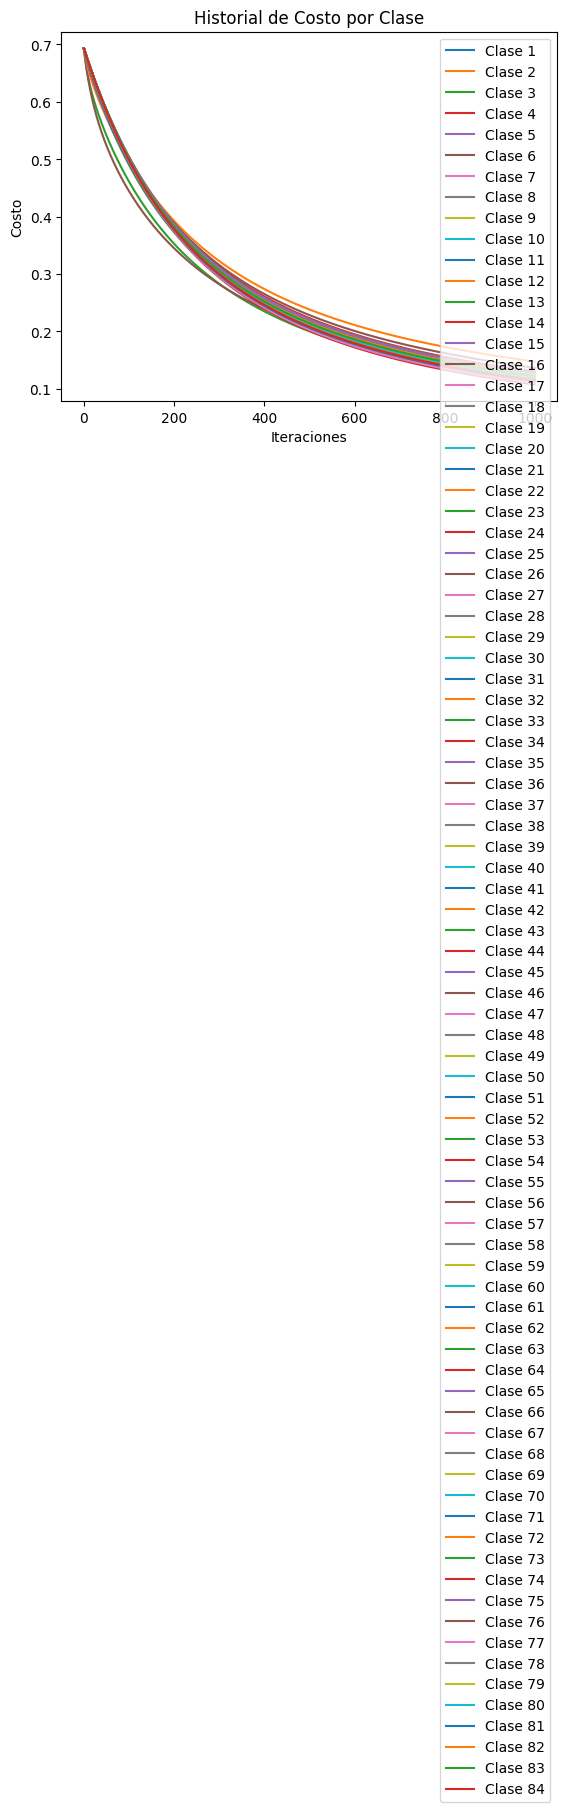

In [56]:
num_labels = 84  # Número de clases
lambda_ = 1.0  # Parámetro de regularización

# Entrenar el modelo usando One-vs-All
all_theta, cost_histories = oneVsAll(X, y, num_labels, lambda_)

# Graficar los costos por clase
for i, cost_history in enumerate(cost_histories):
    plt.plot(cost_history, label=f'Clase {i + 1}')  # Clase i + 1 porque las clases van de 1 a num_labels

plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Historial de Costo por Clase')
plt.legend()
plt.show()


# Implementación de la Función de Predicción One-vs-All

En la fase de predicción, se implementó la función `predictOneVsAll(all_theta, X)`. Esta función tenía el objetivo de realizar predicciones para un problema de clasificación multiclase utilizando el modelo entrenado con el enfoque one-vs-all.

Primero, la función recibió los parámetros entrenados (`all_theta`) y la matriz de características (`X`) para los datos que se iban a predecir. Para preparar los datos, se añadió un término de sesgo a la matriz de características, asegurando que el modelo pudiera realizar las predicciones correctamente.

Luego, se calcularon las probabilidades de cada clase para cada ejemplo utilizando los parámetros del modelo. Esto se hizo multiplicando los datos preparados por los parámetros y aplicando la función sigmoide para obtener las probabilidades.

Finalmente, la función determinó la clase con la probabilidad más alta para cada ejemplo. Estas clases predichas se almacenaron en un vector, que fue devuelto como resultado de la función.

Con esta implementación, se pudo aplicar el modelo de regresión logística entrenado a nuevos datos, obteniendo las predicciones de clase correspondientes.

In [57]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

# Evaluación y Visualización de Predicciones

Durante la evaluación del modelo, se imprimió la forma de la matriz de características `X` y se realizaron predicciones utilizando la función `predictOneVsAll(all_theta, X)`, mostrando la precisión del modelo en el conjunto de entrenamiento como un porcentaje. Luego, se extrajo un subconjunto de datos (de las filas 10 a 150), y se imprimió su forma para confirmar su correcta extracción. Se añadió un término de sesgo a este subconjunto para prepararlo para las predicciones, y se imprimió su nueva forma. Las predicciones para estos datos ajustados se calcularon y se imprimieron, proporcionando una revisión final de las clasificaciones realizadas por el modelo.

In [58]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[10:150, :].copy()
print(XPrueba.shape)


XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[10:150])

(16626, 171)
Precision del conjuto de entrenamiento: 0.12%
(140, 171)
(140, 172)
[ 0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  5  5  5 15
 15 15 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 15 15 15 15 15 15 44
 44 44 44 44 15 15  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


# Evaluación del Modelo con Datos de Entrenamiento y Prueba

Primero, se dividieron los datos en conjuntos de entrenamiento y prueba utilizando un 20% de los datos para la prueba, asegurando la reproducibilidad con una semilla aleatoria. Se imprimió el tamaño de ambos conjuntos para confirmar la partición. A continuación, se entrenó el modelo por primera vez con el conjunto de entrenamiento, y se realizaron predicciones tanto para el conjunto de entrenamiento como para el de prueba. Se calcularon y mostraron las precisiones correspondientes para ambos conjuntos.

Posteriormente, se llevó a cabo un segundo entrenamiento del modelo con el mismo conjunto de entrenamiento para comparar resultados. Se realizaron nuevamente las predicciones en ambos conjuntos y se calcularon las precisiones del segundo entrenamiento. Finalmente, se imprimieron las precisiones obtenidas en ambos entrenamientos para evaluar el rendimiento del modelo en diferentes etapas del proceso de entrenamiento.


Tamaño del conjunto de entrenamiento: (13300, 171)
Tamaño del conjunto de prueba: (3326, 171)
Primera precisión en el conjunto de entrenamiento: 0.10%
Primera precisión en el conjunto de prueba: 0.12%


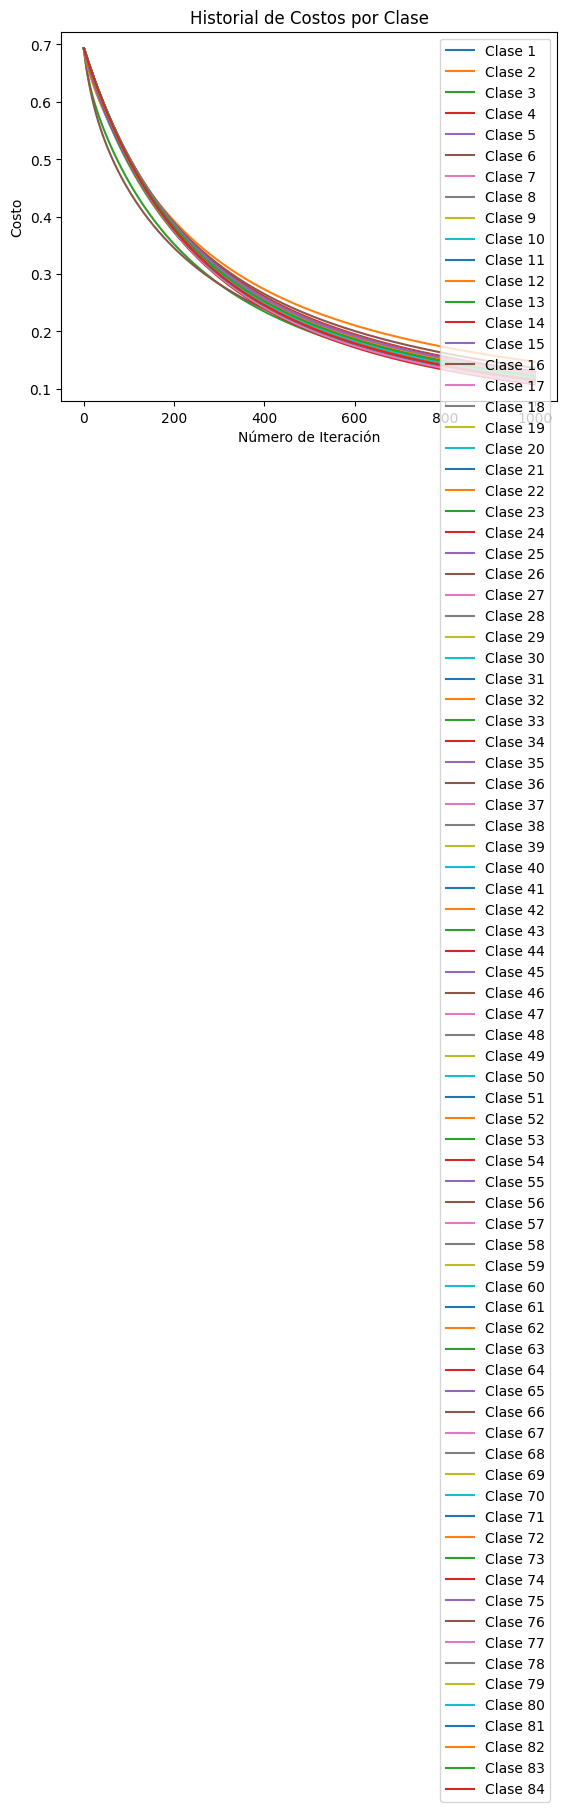

Realizando un segundo entrenamiento con nuevos datos...
Segunda precisión en el conjunto de entrenamiento: 0.10%
Segunda precisión en el conjunto de prueba: 0.12%


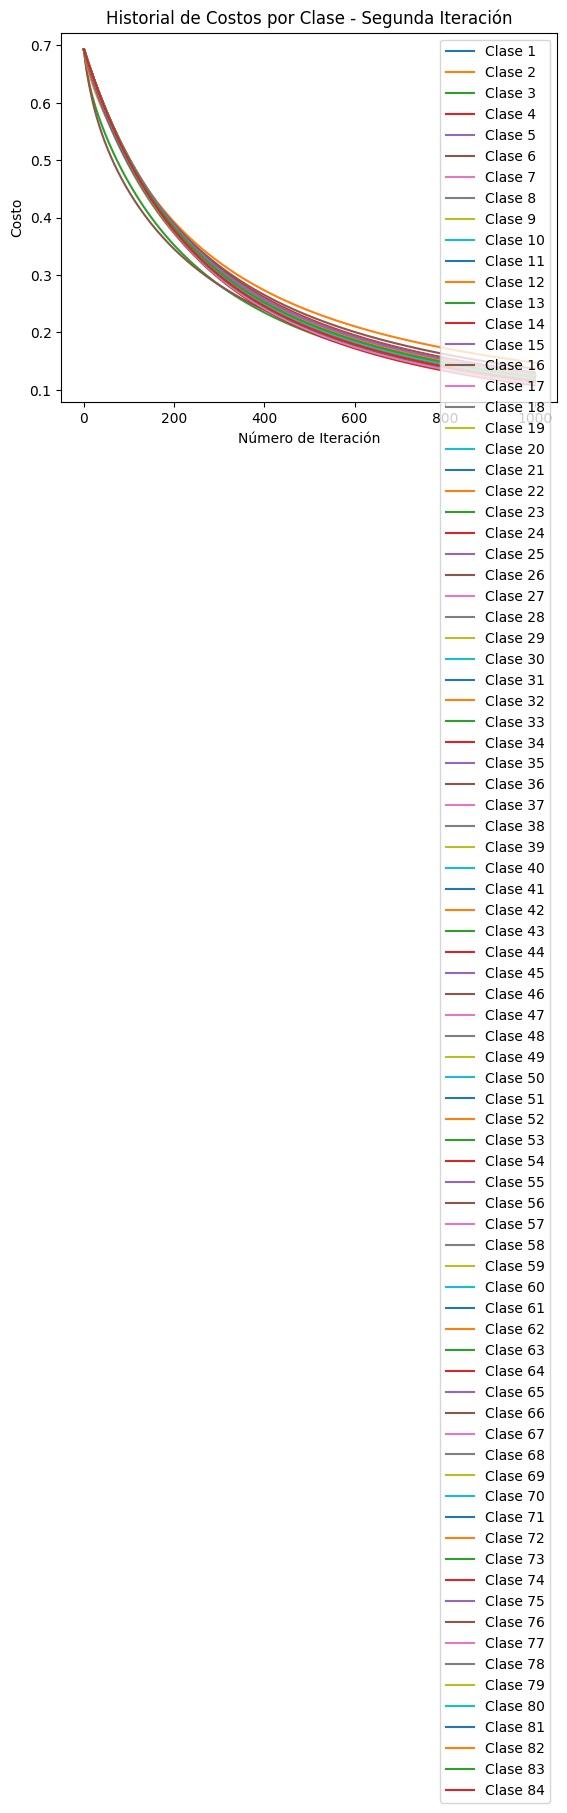

In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

# Entrenar el modelo por primera vez
all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el conjunto de entrenamiento y prueba
y_pred_train_1 = predictOneVsAll(all_theta_1, X_train)
y_pred_test_1 = predictOneVsAll(all_theta_1, X_test)

# Calcular la precisión en ambos conjuntos
accuracy_train_1 = accuracy_score(y_train, y_pred_train_1) * 100
accuracy_test_1 = accuracy_score(y_test, y_pred_test_1) * 100

print(f'Primera precisión en el conjunto de entrenamiento: {accuracy_train_1:.2f}%')
print(f'Primera precisión en el conjunto de prueba: {accuracy_test_1:.2f}%')

# Graficar el historial de costos para la primera iteración
for i in range(num_labels):
    plt.plot(cost_histories_1[i], label=f'Clase {i+1}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase')
plt.legend()
plt.show()

# Hacer un segundo entrenamiento
print("Realizando un segundo entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (puedes cambiar parámetros si lo necesitas)
all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_2 = predictOneVsAll(all_theta_2, X_train)
y_pred_test_2 = predictOneVsAll(all_theta_2, X_test)

# Calcular la precisión en ambos conjuntos para el segundo entrenamiento
accuracy_train_2 = accuracy_score(y_train, y_pred_train_2) * 100
accuracy_test_2 = accuracy_score(y_test, y_pred_test_2) * 100

print(f'Segunda precisión en el conjunto de entrenamiento: {accuracy_train_2:.2f}%')
print(f'Segunda precisión en el conjunto de prueba: {accuracy_test_2:.2f}%')

# Graficar el historial de costos para la segunda iteración
for i in range(num_labels):
    plt.plot(cost_histories_2[i], label=f'Clase {i+1}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Segunda Iteración')
plt.legend()
plt.show()